# **IDL Project Assignment: Task 2 - Regularizers**

In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
tf.__version__

'2.3.0'

170500096/170498071 [==============================] - 4s 0us/step


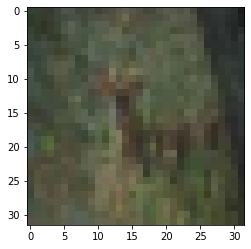

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
plt.imshow(train_images[10], cmap=plt.cm.binary)

In [ ]:
train_images.shape, train_labels.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
batch_size = 1024
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_data = train_data.shuffle(10000, seed=1, reshuffle_each_iteration=True)
train_data = train_data.batch(batch_size)
test_data = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_data = test_data.shuffle(10000, seed=1, reshuffle_each_iteration=True)
test_data = test_data.batch(batch_size)

##Architecture 1

In [ ]:
def model_config(act_fn, config):
  layers_config1 = [
          tf.keras.layers.Conv2D(32,3,padding='same',activation=act_fn,input_shape=(32,32,3)),
          tf.keras.layers.Conv2D(32,3,padding='same',activation=act_fn),
          tf.keras.layers.MaxPool2D((2,2)),
          # tf.keras.layers.Dropout(0.2),

          tf.keras.layers.Conv2D(64,3,padding='same',activation=act_fn),
          tf.keras.layers.Conv2D(64,3,padding='same',activation=act_fn),
          tf.keras.layers.MaxPool2D((2,2)),
          # tf.keras.layers.Dropout(0.3),

          tf.keras.layers.Conv2D(128,3,padding='same',activation=act_fn),
          tf.keras.layers.Conv2D(128,3,padding='same',activation=act_fn),
          tf.keras.layers.MaxPool2D((2,2)),
          # tf.keras.layers.Dropout(0.4),

          tf.keras.layers.Conv2D(256,3,padding='same',activation=act_fn),
          tf.keras.layers.MaxPool2D((2,2)),
          # tf.keras.layers.Dropout(0.25),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128,activation=act_fn),
          #tf.keras.layers.Dropout(0.5),

          tf.keras.layers.Dense(256,activation=act_fn),
          tf.keras.layers.Dense(512,activation=act_fn),
          tf.keras.layers.Dense(10)]

  layers_config2 = [
          tf.keras.layers.Conv2D(32,3,padding='same',activation=act_fn,input_shape=(32,32,3)),
          tf.keras.layers.Conv2D(32,3,padding='same',activation=act_fn),
          tf.keras.layers.MaxPool2D((2,2)),
          tf.keras.layers.Dropout(0.2),

          tf.keras.layers.Conv2D(64,3,padding='same',activation=act_fn),
          tf.keras.layers.Conv2D(64,3,padding='same',activation=act_fn),
          tf.keras.layers.MaxPool2D((2,2)),
          tf.keras.layers.Dropout(0.3),

          tf.keras.layers.Conv2D(128,3,padding='same',activation=act_fn),
          tf.keras.layers.Conv2D(128,3,padding='same',activation=act_fn),
          tf.keras.layers.MaxPool2D((2,2)),
          tf.keras.layers.Dropout(0.4),

          tf.keras.layers.Conv2D(256,3,padding='same',activation=act_fn),
          tf.keras.layers.MaxPool2D((2,2)),
          tf.keras.layers.Dropout(0.25),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128,activation=act_fn),
          #tf.keras.layers.Dropout(0.5),

          tf.keras.layers.Dense(256,activation=act_fn),
          tf.keras.layers.Dense(512,activation=act_fn),
          tf.keras.layers.Dense(10)]

  layers_config3 = [
          tf.keras.layers.Conv2D(32,3,padding='same',activation=act_fn,input_shape=(32,32,3)),
          tf.keras.layers.Conv2D(32,3,padding='same',activation=act_fn, kernel_regularizer='l2'),
          tf.keras.layers.MaxPool2D((2,2)),
          

          tf.keras.layers.Conv2D(64,3,padding='same',activation=act_fn,kernel_regularizer='l2'),
          tf.keras.layers.Conv2D(64,3,padding='same',activation=act_fn,kernel_regularizer='l2'),
          tf.keras.layers.MaxPool2D((2,2)),
          

          tf.keras.layers.Conv2D(128,3,padding='same',activation=act_fn,kernel_regularizer='l2'),
          tf.keras.layers.Conv2D(128,3,padding='same',activation=act_fn,kernel_regularizer='l2'),
          tf.keras.layers.MaxPool2D((2,2)),
          

          tf.keras.layers.Conv2D(256,3,padding='same',activation=act_fn,kernel_regularizer='l2'),
          tf.keras.layers.MaxPool2D((2,2)),
         

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128,activation=act_fn),
          

          tf.keras.layers.Dense(256,activation=act_fn),
          tf.keras.layers.Dense(512,activation=act_fn),
          tf.keras.layers.Dense(10)]


    ## Define the model
  if config == 'layers_config1':
    model = tf.keras.Sequential(layers_config1)
  elif config == 'layers_config2':
    model = tf.keras.Sequential(layers_config2)
  else:
    model = tf.keras.Sequential(layers_config3)
   

  return model

In [ ]:
def train(opt_type, n_epochs, model, lr):
    if opt_type == 'Adam':
        opt = tf.keras.optimizers.Adam(learning_rate=lr)
    elif opt_type == 'SGD':
        opt = tf.keras.optimizers.SGD(learning_rate=lr)
    else:
        opt = tf.keras.optimizers.RMSprop(learning_rate=lr)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
    test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
    test_accuracy = tf.keras.metrics.Accuracy()
    test_acc_list = []
    loss_list = []
    step_list = []
    acc_list = []
    steps = 0
    for epoch in range(n_epochs):
       
        for img_batch, lbl_batch in train_data:
            # print(img_batch.shape, lbl_batch.shape)
            steps = steps+1
            with tf.GradientTape(persistent=True) as tape:
                logits = model(img_batch, training=True)
                loss_value = loss_fn(lbl_batch, logits)
            grads = tape.gradient(loss_value, model.trainable_weights)

            opt.apply_gradients(zip(grads, model.trainable_weights))
            acc = train_acc_metric(lbl_batch, logits)
            
        if not epoch % 2:
          print('Epoch no %d' % (epoch,))
          print("Loss: {} Accuracy: {}".format(loss_value, train_acc_metric.result()))
          train_acc_metric.reset_states()
        loss_list.append(loss_value)
        step_list.append(steps)
        acc_list.append(acc)

        # For test data metrics
        for (x, y) in test_data:
          # training=False is needed only if there are layers with different
          # behavior during training versus inference (e.g. Dropout).
          logits = model(x, training=False)
          prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
          test_accuracy(prediction, y)

        test_acc_list.append(test_accuracy.result())
        #test_acc = model.predict(test_data)
        
    return loss_list, step_list, acc_list, test_acc_list

In [ ]:
def plot_performance(df):
  fig = plt.figure(figsize = (12,6))
  ax1 = fig.subplots(1,1)
  steps = df['Steps']
  acc = df['Accuracy']
  test = df['Test Accuracy']
  ax1.plot(steps,acc, label = 'Training Accuracy')
  ax1.plot(steps,test, label = 'Test Accuracy')
  ax1.set_title('Without Regualizer')
  ax1.set_xlabel("Steps", fontsize = 14)
  ax1.set_ylabel("Accuracy", fontsize = 14)
  ax1.legend()
  plt.tight_layout()

###Without Regularizers

In [ ]:
n_epoch, lr = 400, 0.001
opt_type, act_fn, config = 'Adam', 'relu', 'layers_config1'
model = model_config(act_fn, config)
loss_list, step_list, acc_list, test_acc_list = train(opt_type, n_epoch, model, lr)

arc1_loss, arc1_acc, arc1_steps = loss_list, acc_list, step_list
arc1_acc, arc1_loss, arc1_steps = [elem.numpy() for elem in arc1_acc], [elem.numpy() for elem in arc1_loss], arc1_steps
arc1_test_acc = [elem.numpy() for elem in test_acc_list]
AR1 = pd.DataFrame([arc1_steps, arc1_acc, arc1_loss, arc1_test_acc]).T
AR1.columns = ['Steps', 'Accuracy', 'Loss', 'Test Accuracy']

Epoch no 0
Loss: 1.9746484756469727 Accuracy: 0.1885800063610077
Epoch no 2
Loss: 1.4640668630599976 Accuracy: 0.3826099932193756
Epoch no 4
Loss: 1.098678708076477 Accuracy: 0.5494999885559082
Epoch no 6
Loss: 0.8174039721488953 Accuracy: 0.6528199911117554
Epoch no 8
Loss: 0.5988861918449402 Accuracy: 0.7333300113677979
Epoch no 10
Loss: 0.4874550402164459 Accuracy: 0.7946900129318237
Epoch no 12
Loss: 0.3913734257221222 Accuracy: 0.8580499887466431
Epoch no 14
Loss: 0.2365226447582245 Accuracy: 0.9008100032806396
Epoch no 16
Loss: 0.10680815577507019 Accuracy: 0.9395099878311157
Epoch no 18
Loss: 0.14741352200508118 Accuracy: 0.9390400052070618
Epoch no 20
Loss: 0.09764014184474945 Accuracy: 0.9621599912643433
Epoch no 22
Loss: 0.06747176498174667 Accuracy: 0.9675899744033813
Epoch no 24
Loss: 0.10196530073881149 Accuracy: 0.9707800149917603
Epoch no 26
Loss: 0.08578837662935257 Accuracy: 0.9710900187492371
Epoch no 28
Loss: 0.05029991269111633 Accuracy: 0.9749199748039246
Epoch no 

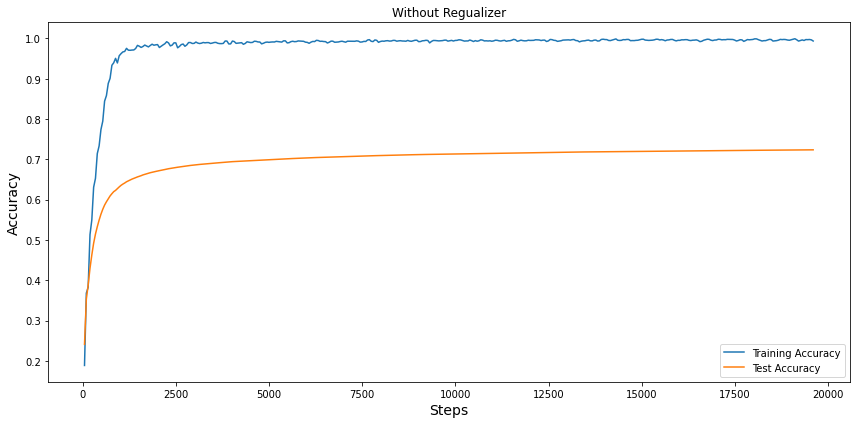

In [ ]:
plot_performance(AR1)

###With Regularizers(Dropout)

In [ ]:
n_epoch, lr = 400, 0.001
opt_type, act_fn, config = 'Adam', 'relu', 'layers_config2'
model = model_config(act_fn, config)
loss_list, step_list, acc_list, test_acc_list = train(opt_type, n_epoch, model, lr)

arc1_loss, arc1_acc, arc1_steps = loss_list, acc_list, step_list
arc1_acc, arc1_loss, arc1_steps = [elem.numpy() for elem in arc1_acc], [elem.numpy() for elem in arc1_loss], arc1_steps
arc1_test_acc = [elem.numpy() for elem in test_acc_list]
AR1 = pd.DataFrame([arc1_steps, arc1_acc, arc1_loss, arc1_test_acc]).T
AR1.columns = ['Steps', 'Accuracy', 'Loss', 'Test Accuracy']

Epoch no 0
Loss: 2.288347005844116 Accuracy: 0.10756000131368637
Epoch no 2
Loss: 1.7737404108047485 Accuracy: 0.19994999468326569
Epoch no 4
Loss: 1.5795551538467407 Accuracy: 0.32642999291419983
Epoch no 6
Loss: 1.4747910499572754 Accuracy: 0.41964998841285706
Epoch no 8
Loss: 1.3103970289230347 Accuracy: 0.49998998641967773
Epoch no 10
Loss: 1.161571741104126 Accuracy: 0.5573400259017944
Epoch no 12
Loss: 1.0682787895202637 Accuracy: 0.5952200293540955
Epoch no 14
Loss: 0.9280123710632324 Accuracy: 0.6239399909973145
Epoch no 16
Loss: 0.9411179423332214 Accuracy: 0.6452900171279907
Epoch no 18
Loss: 0.9493314623832703 Accuracy: 0.665690004825592
Epoch no 20
Loss: 0.8949651122093201 Accuracy: 0.6799499988555908
Epoch no 22
Loss: 0.8782505989074707 Accuracy: 0.6938700079917908
Epoch no 24
Loss: 0.8702954053878784 Accuracy: 0.7043799757957458
Epoch no 26
Loss: 0.8055406212806702 Accuracy: 0.7150700092315674
Epoch no 28
Loss: 0.8740003108978271 Accuracy: 0.7248799800872803
Epoch no 30
L

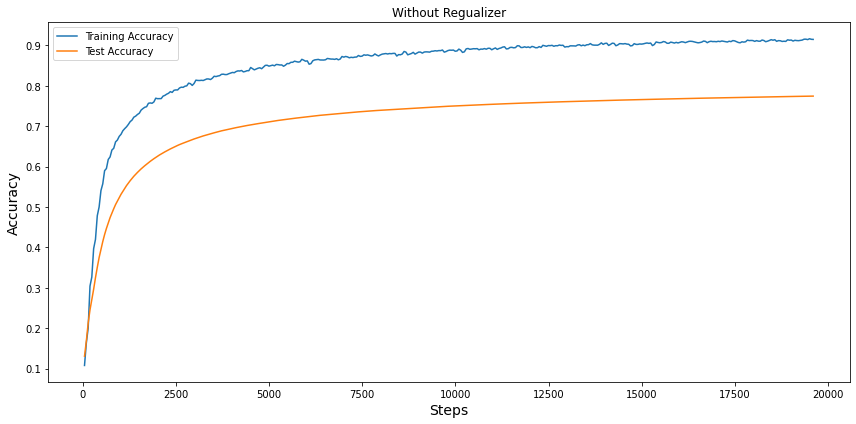

In [ ]:
plot_performance(AR1)

###With Regularizer(L2)

In [ ]:
n_epoch, lr = 400, 0.001
opt_type, act_fn, config = 'Adam', 'relu', 'layers_config3'
model = model_config(act_fn, config)
loss_list, step_list, acc_list, test_acc_list = train(opt_type, n_epoch, model, lr)

arc1_loss, arc1_acc, arc1_steps = loss_list, acc_list, step_list
arc1_acc, arc1_loss, arc1_steps = [elem.numpy() for elem in arc1_acc], [elem.numpy() for elem in arc1_loss], arc1_steps
arc1_test_acc = [elem.numpy() for elem in test_acc_list]
AR1 = pd.DataFrame([arc1_steps, arc1_acc, arc1_loss, arc1_test_acc]).T
AR1.columns = ['Steps', 'Accuracy', 'Loss', 'Test Accuracy']

Epoch no 0
Loss: 1.806810736656189 Accuracy: 0.21610000729560852
Epoch no 2
Loss: 1.3117460012435913 Accuracy: 0.42952001094818115
Epoch no 4
Loss: 1.0946578979492188 Accuracy: 0.5730900168418884
Epoch no 6
Loss: 0.8941212892532349 Accuracy: 0.6619899868965149
Epoch no 8
Loss: 0.6629622578620911 Accuracy: 0.7372000217437744
Epoch no 10
Loss: 0.578070342540741 Accuracy: 0.7984600067138672
Epoch no 12
Loss: 0.41062790155410767 Accuracy: 0.846560001373291
Epoch no 14
Loss: 0.29582279920578003 Accuracy: 0.8954200148582458
Epoch no 16
Loss: 0.38254058361053467 Accuracy: 0.9174200296401978
Epoch no 18
Loss: 0.16207173466682434 Accuracy: 0.9329699873924255
Epoch no 20
Loss: 0.16772377490997314 Accuracy: 0.9406999945640564
Epoch no 22
Loss: 0.13204888999462128 Accuracy: 0.9562900066375732
Epoch no 24
Loss: 0.1264898031949997 Accuracy: 0.9580900073051453
Epoch no 26
Loss: 0.10051349550485611 Accuracy: 0.9695000052452087
Epoch no 28
Loss: 0.0716213658452034 Accuracy: 0.9710500240325928
Epoch no 

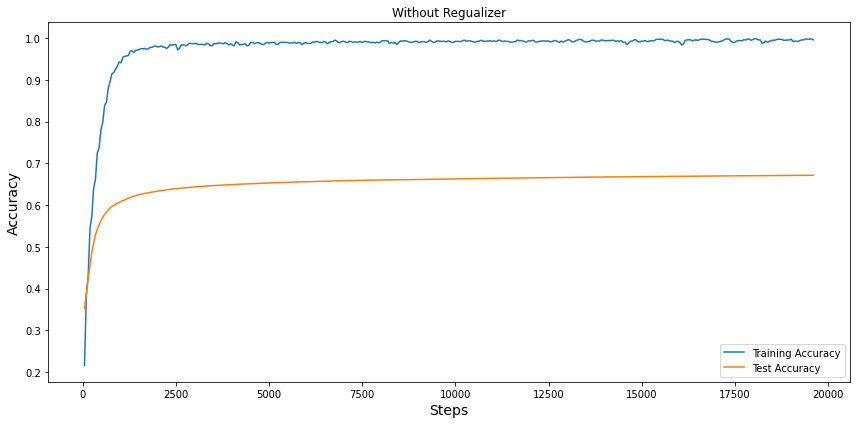

In [ ]:
plot_performance(AR1)

##Architecture 2

In [ ]:
def model_config(act_fn, config):

  layers_config1 = [
          tf.keras.layers.Conv2D(16,3,padding='same',activation=act_fn,input_shape=(32,32,3)),
          tf.keras.layers.Conv2D(16,3,padding='same',activation=act_fn),
          tf.keras.layers.MaxPool2D((2,2)),

          tf.keras.layers.Conv2D(32,3,padding='same',activation=act_fn),
          tf.keras.layers.Conv2D(32,3,padding='same',activation=act_fn),
          tf.keras.layers.MaxPool2D((2,2)),
          # tf.keras.layers.Dropout(0.2),

          tf.keras.layers.Conv2D(64,3,padding='same',activation=act_fn),
          tf.keras.layers.Conv2D(64,3,padding='same',activation=act_fn),
          tf.keras.layers.MaxPool2D((2,2)),
          # tf.keras.layers.Dropout(0.3),

          tf.keras.layers.Conv2D(128,3,padding='same',activation=act_fn),
          tf.keras.layers.Conv2D(128,3,padding='same',activation=act_fn),
          tf.keras.layers.MaxPool2D((2,2)),
          # tf.keras.layers.Dropout(0.4),

          tf.keras.layers.Conv2D(256,3,padding='same',activation=act_fn),
          tf.keras.layers.MaxPool2D((2,2)),
          # tf.keras.layers.Dropout(0.25),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128,activation=act_fn),
          #tf.keras.layers.Dropout(0.5),

          tf.keras.layers.Dense(256,activation=act_fn),
          tf.keras.layers.Dense(512,activation=act_fn),
          tf.keras.layers.Dense(10)]

  layers_config2 = [
          tf.keras.layers.Conv2D(16,3,padding='same',activation=act_fn,input_shape=(32,32,3)),
          tf.keras.layers.Conv2D(16,3,padding='same',activation=act_fn),
          tf.keras.layers.MaxPool2D((2,2)),
          

          tf.keras.layers.Conv2D(32,3,padding='same',activation=act_fn),
          tf.keras.layers.Conv2D(32,3,padding='same',activation=act_fn),
          tf.keras.layers.MaxPool2D((2,2)),
          tf.keras.layers.Dropout(0.2),

          tf.keras.layers.Conv2D(64,3,padding='same',activation=act_fn),
          tf.keras.layers.Conv2D(64,3,padding='same',activation=act_fn),
          tf.keras.layers.MaxPool2D((2,2)),
          tf.keras.layers.Dropout(0.3),

          tf.keras.layers.Conv2D(128,3,padding='same',activation=act_fn),
          tf.keras.layers.Conv2D(128,3,padding='same',activation=act_fn),
          tf.keras.layers.MaxPool2D((2,2)),
          tf.keras.layers.Dropout(0.4),

          tf.keras.layers.Conv2D(256,3,padding='same',activation=act_fn),
          tf.keras.layers.MaxPool2D((2,2)),
          tf.keras.layers.Dropout(0.25),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128,activation=act_fn),
          tf.keras.layers.Dropout(0.5),

          tf.keras.layers.Dense(256,activation=act_fn),
          tf.keras.layers.Dense(512,activation=act_fn),
          tf.keras.layers.Dense(10)]

  layers_config3 = [
          tf.keras.layers.Conv2D(16,3,padding='same',activation=act_fn,input_shape=(32,32,3)),
          tf.keras.layers.Conv2D(16,3,padding='same',activation=act_fn,kernel_regularizer='l2'),
          tf.keras.layers.MaxPool2D((2,2)),

          tf.keras.layers.Conv2D(32,3,padding='same',activation=act_fn,kernel_regularizer='l2'),
          tf.keras.layers.Conv2D(32,3,padding='same',activation=act_fn,kernel_regularizer='l2'),
          tf.keras.layers.MaxPool2D((2,2)),
          

          tf.keras.layers.Conv2D(64,3,padding='same',activation=act_fn,kernel_regularizer='l2'),
          tf.keras.layers.Conv2D(64,3,padding='same',activation=act_fn,kernel_regularizer='l2'),
          tf.keras.layers.MaxPool2D((2,2)),
          

          tf.keras.layers.Conv2D(128,3,padding='same',activation=act_fn,kernel_regularizer='l2'),
          tf.keras.layers.Conv2D(128,3,padding='same',activation=act_fn,kernel_regularizer='l2'),
          tf.keras.layers.MaxPool2D((2,2)),
         

          tf.keras.layers.Conv2D(256,3,padding='same',activation=act_fn,kernel_regularizer='l2'),
          tf.keras.layers.MaxPool2D((2,2)),
         

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128,activation=act_fn),
          

          tf.keras.layers.Dense(256,activation=act_fn),
          tf.keras.layers.Dense(512,activation=act_fn),
          tf.keras.layers.Dense(10)]

    ## Define the model
  if config == 'layers_config1':
    model = tf.keras.Sequential(layers_config1)
  elif config == 'layers_config2':
    model = tf.keras.Sequential(layers_config2)       
  else:
    model = tf.keras.Sequential(layers_config3)
   

  return model

###Without Regularizer

In [ ]:
n_epoch, lr = 400, 0.001
opt_type, act_fn, config = 'Adam', 'relu', 'layers_config1'
model = model_config(act_fn, config)
loss_list, step_list, acc_list, test_acc_list = train(opt_type, n_epoch, model, lr)

arc1_loss, arc1_acc, arc1_steps = loss_list, acc_list, step_list
arc1_acc, arc1_loss, arc1_steps = [elem.numpy() for elem in arc1_acc], [elem.numpy() for elem in arc1_loss], arc1_steps
arc1_test_acc = [elem.numpy() for elem in test_acc_list]
AR1 = pd.DataFrame([arc1_steps, arc1_acc, arc1_loss, arc1_test_acc]).T
AR1.columns = ['Steps', 'Accuracy', 'Loss', 'Test Accuracy']

Epoch no 0
Loss: 1.7821967601776123 Accuracy: 0.20715999603271484
Epoch no 2
Loss: 1.275343894958496 Accuracy: 0.4323999881744385
Epoch no 4
Loss: 1.0952483415603638 Accuracy: 0.5732100009918213
Epoch no 6
Loss: 0.8368518948554993 Accuracy: 0.6604800224304199
Epoch no 8
Loss: 0.6630887389183044 Accuracy: 0.7312099933624268
Epoch no 10
Loss: 0.586701512336731 Accuracy: 0.7864099740982056
Epoch no 12
Loss: 0.38805511593818665 Accuracy: 0.8325799703598022
Epoch no 14
Loss: 0.3027663230895996 Accuracy: 0.8816999793052673
Epoch no 16
Loss: 0.295199990272522 Accuracy: 0.8977299928665161
Epoch no 18
Loss: 0.1777624785900116 Accuracy: 0.9318100214004517
Epoch no 20
Loss: 0.17663638293743134 Accuracy: 0.9417399764060974
Epoch no 22
Loss: 0.10681458562612534 Accuracy: 0.9531199932098389
Epoch no 24
Loss: 0.14526575803756714 Accuracy: 0.960919976234436
Epoch no 26
Loss: 0.11382195353507996 Accuracy: 0.9599599838256836
Epoch no 28
Loss: 0.08563899993896484 Accuracy: 0.9665399789810181
Epoch no 30


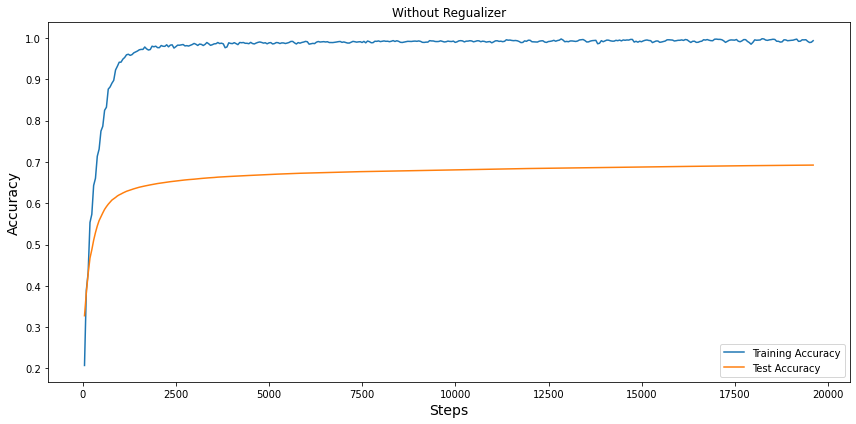

In [ ]:
plot_performance(AR1)

###With Regularizers(Dropout)

In [ ]:
n_epoch, lr = 400, 0.001
opt_type, act_fn, config = 'Adam', 'relu', 'layers_config2'
model = model_config(act_fn, config)
loss_list, step_list, acc_list, test_acc_list = train(opt_type, n_epoch, model, lr)

arc1_loss, arc1_acc, arc1_steps = loss_list, acc_list, step_list
arc1_acc, arc1_loss, arc1_steps = [elem.numpy() for elem in arc1_acc], [elem.numpy() for elem in arc1_loss], arc1_steps
arc1_test_acc = [elem.numpy() for elem in test_acc_list]
AR1 = pd.DataFrame([arc1_steps, arc1_acc, arc1_loss, arc1_test_acc]).T
AR1.columns = ['Steps', 'Accuracy', 'Loss', 'Test Accuracy']

Epoch no 0
Loss: 2.2160279750823975 Accuracy: 0.10933999717235565
Epoch no 2
Loss: 1.9266812801361084 Accuracy: 0.18655000627040863
Epoch no 4
Loss: 1.6505510807037354 Accuracy: 0.2901799976825714
Epoch no 6
Loss: 1.437243938446045 Accuracy: 0.4056999981403351
Epoch no 8
Loss: 1.3337678909301758 Accuracy: 0.49632999300956726
Epoch no 10
Loss: 1.1902081966400146 Accuracy: 0.5589799880981445
Epoch no 12
Loss: 1.1277493238449097 Accuracy: 0.5995399951934814
Epoch no 14
Loss: 0.9779095649719238 Accuracy: 0.6243699789047241
Epoch no 16
Loss: 0.8993668556213379 Accuracy: 0.6491400003433228
Epoch no 18
Loss: 0.8889274597167969 Accuracy: 0.6735299825668335
Epoch no 20
Loss: 0.9108692407608032 Accuracy: 0.6884599924087524
Epoch no 22
Loss: 0.8312968015670776 Accuracy: 0.7006400227546692
Epoch no 24
Loss: 0.8168490529060364 Accuracy: 0.7115200161933899
Epoch no 26
Loss: 0.7313849329948425 Accuracy: 0.7269200086593628
Epoch no 28
Loss: 0.7973024845123291 Accuracy: 0.731909990310669
Epoch no 30
Lo

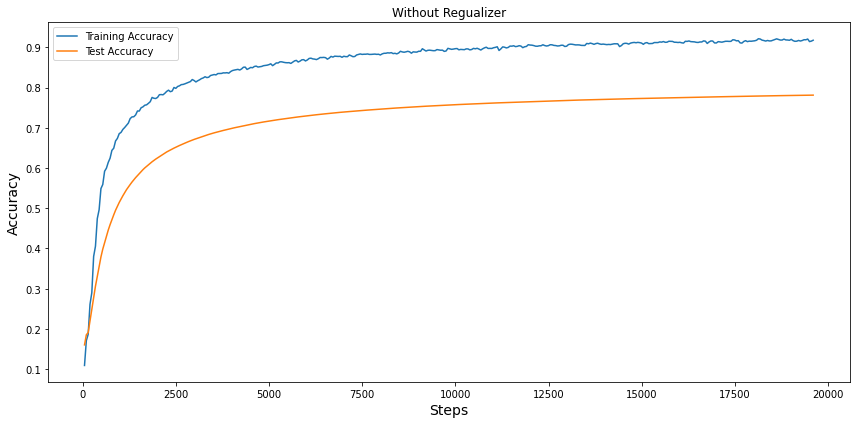

In [ ]:
plot_performance(AR1)

###With Regularizer(L2)

In [ ]:
n_epoch, lr = 400, 0.001
opt_type, act_fn, config = 'Adam', 'relu', 'layers_config3'
model = model_config(act_fn, config)
loss_list, step_list, acc_list, test_acc_list = train(opt_type, n_epoch, model, lr)

arc1_loss, arc1_acc, arc1_steps = loss_list, acc_list, step_list
arc1_acc, arc1_loss, arc1_steps = [elem.numpy() for elem in arc1_acc], [elem.numpy() for elem in arc1_loss], arc1_steps
arc1_test_acc = [elem.numpy() for elem in test_acc_list]
AR1 = pd.DataFrame([arc1_steps, arc1_acc, arc1_loss, arc1_test_acc]).T
AR1.columns = ['Steps', 'Accuracy', 'Loss', 'Test Accuracy']

Epoch no 0
Loss: 1.8996225595474243 Accuracy: 0.19183999300003052
Epoch no 2
Loss: 1.3167810440063477 Accuracy: 0.41530999541282654
Epoch no 4
Loss: 1.057603359222412 Accuracy: 0.5551400184631348
Epoch no 6
Loss: 0.8650558590888977 Accuracy: 0.6444799900054932
Epoch no 8
Loss: 0.7137819528579712 Accuracy: 0.7077100276947021
Epoch no 10
Loss: 0.6102555990219116 Accuracy: 0.7703099846839905
Epoch no 12
Loss: 0.40333065390586853 Accuracy: 0.8304200172424316
Epoch no 14
Loss: 0.3930615782737732 Accuracy: 0.8656700253486633
Epoch no 16
Loss: 0.2284911870956421 Accuracy: 0.9020699858665466
Epoch no 18
Loss: 0.31039199233055115 Accuracy: 0.9247000217437744
Epoch no 20
Loss: 0.18145671486854553 Accuracy: 0.9340999722480774
Epoch no 22
Loss: 0.14674794673919678 Accuracy: 0.9493799805641174
Epoch no 24
Loss: 0.21541807055473328 Accuracy: 0.9506999850273132
Epoch no 26
Loss: 0.11001136153936386 Accuracy: 0.9632300138473511
Epoch no 28
Loss: 0.12269142270088196 Accuracy: 0.9678900241851807
Epoch n

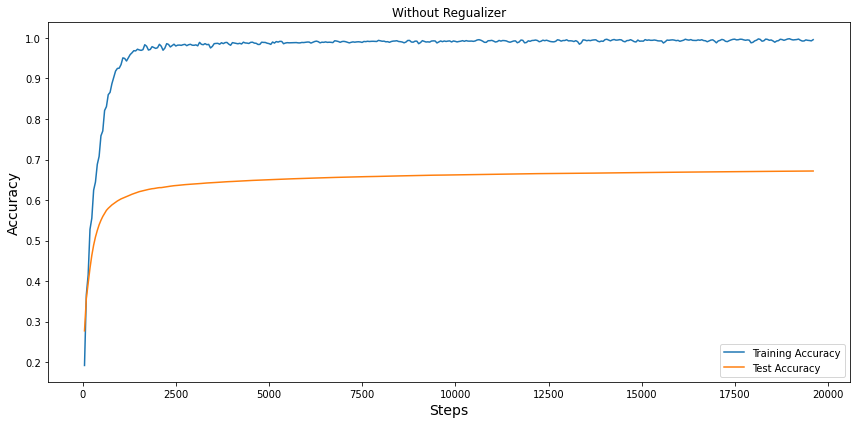

In [ ]:
plot_performance(AR1)

Observations:

1. Without regularizer, the model has over fit and the training accuracy is very high. The test accuracy is quite low. The gap between the train and test accuracy curves is very large.
2. After adding Dropout layers, the training accuracy decreased and test accuracy significantly increased. The gap between both the curves reduced significantly indicating that using this regularizer, overfitting could be avoided.
3. Also tried L1 and L2 regularizer(400 epochs), but the result was unexpected. The model was still overfitting even after adding this regularizer.